# importing modules

In [108]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
#import data


# Reading the data (csv file)

In [109]:
db = pd.read_csv('C:/Users/kotar/Desktop/projects/mL ineuron/internship/data sets/ENB2012_data.csv')

# renaming columns

In [110]:
db.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [111]:
Y1=db['heating_load']
Y2=db['cooling_load']
X=db.drop(['heating_load','cooling_load','roof_area','surface_area'],axis=1)

In [112]:
db.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28


# checking null values

In [113]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# After analysis we have observed that there are no null values present in the given data set.


# plotting heat-map correlation

<AxesSubplot:>

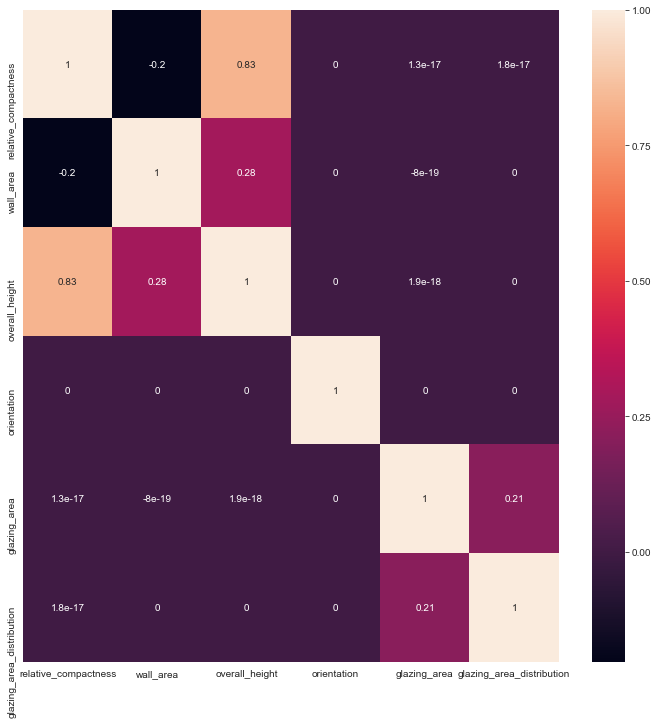

In [114]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(),annot=True)

# From heatmap it is observed that no values closer to 1 indicating that no two columns are correlated.


In [115]:
# Change number format in correlations
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
db.corr()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,0.00,0.00,0.62,0.63
surface_area,-0.99,1.00,0.20,0.88,-0.86,0.00,0.00,-0.00,-0.66,-0.67
wall_area,-0.20,0.20,1.00,-0.29,0.28,0.00,-0.00,0.00,0.46,0.43
roof_area,-0.87,0.88,-0.29,1.00,-0.97,0.00,-0.00,-0.00,-0.86,-0.86
overall_height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,0.00,0.89,0.90
orientation,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.01
glazing_area,0.00,0.00,-0.00,-0.00,0.00,0.00,1.00,0.21,0.27,0.21
glazing_area_distribution,0.00,-0.00,0.00,-0.00,0.00,0.00,0.21,1.00,0.09,0.05
heating_load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
cooling_load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


# plotting pair plot

<Figure size 2160x1080 with 0 Axes>

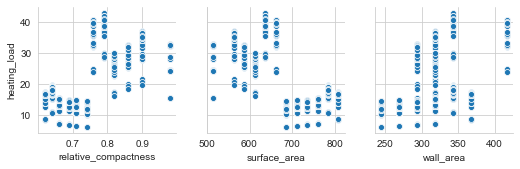

In [145]:
plt.figure(figsize=(30,15))
sns.pairplot(data=db, y_vars=['heating_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area',])
plt.show()

<Figure size 2160x1080 with 0 Axes>

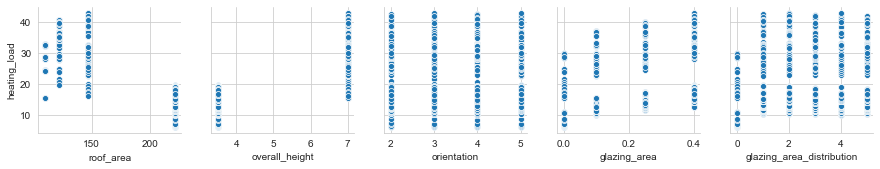

In [146]:
plt.figure(figsize=(30,15))
sns.pairplot(data=db, y_vars=['heating_load'],
             x_vars=[ 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

<Figure size 2880x1080 with 0 Axes>

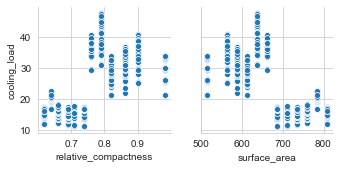

In [142]:
plt.figure(figsize=(40,15))
sns.pairplot(data=db, y_vars=['cooling_load'],
             x_vars=['relative_compactness', 'surface_area'])
plt.show()

<Figure size 2160x1080 with 0 Axes>

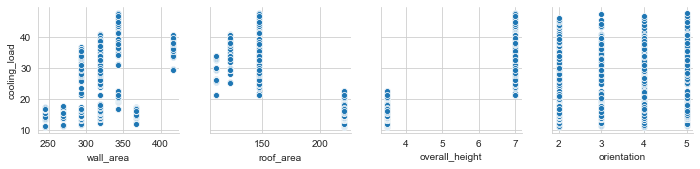

In [144]:
plt.figure(figsize=(30,15))
sns.pairplot(data=db, y_vars=['cooling_load',],
             x_vars=['wall_area', 'roof_area', 'overall_height',
                     'orientation',])
plt.show()

In [117]:
# Check missing values
db.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

# no null values exist

In [118]:
#Summary statistics
db.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


# plotting the histogram

array([[<AxesSubplot:title={'center':'cooling_load'}>,
        <AxesSubplot:title={'center':'glazing_area'}>,
        <AxesSubplot:title={'center':'glazing_area_distribution'}>],
       [<AxesSubplot:title={'center':'heating_load'}>,
        <AxesSubplot:title={'center':'orientation'}>,
        <AxesSubplot:title={'center':'overall_height'}>],
       [<AxesSubplot:title={'center':'relative_compactness'}>,
        <AxesSubplot:title={'center':'roof_area'}>,
        <AxesSubplot:title={'center':'surface_area'}>],
       [<AxesSubplot:title={'center':'wall_area'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

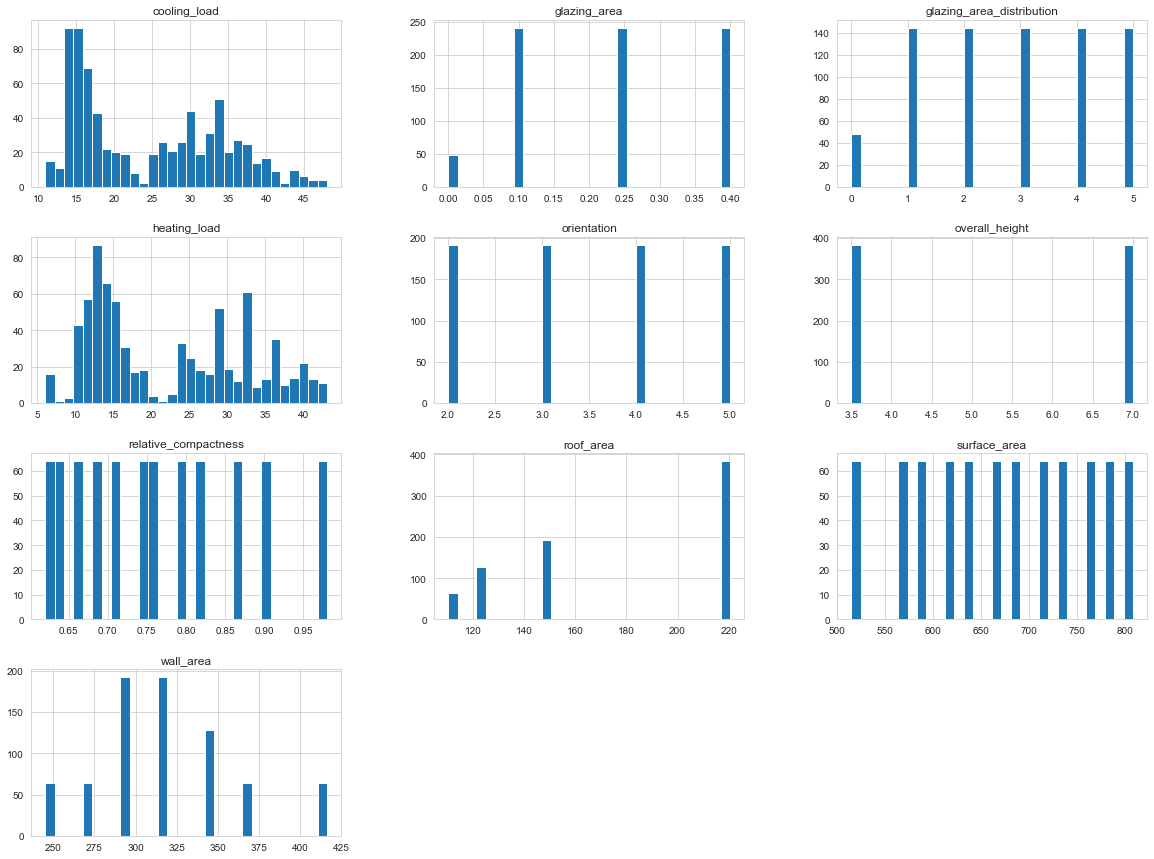

In [119]:
db.hist(bins=30, figsize=(20,15)) 

# ploting distplot and boxplot 

<AxesSubplot:xlabel='cooling_load'>

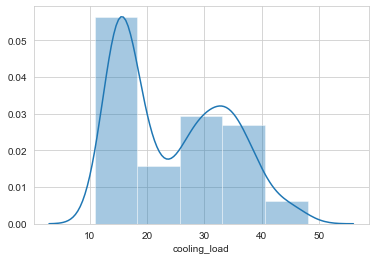

In [120]:
sns.distplot(db['cooling_load'], bins=5)

<AxesSubplot:xlabel='heating_load'>

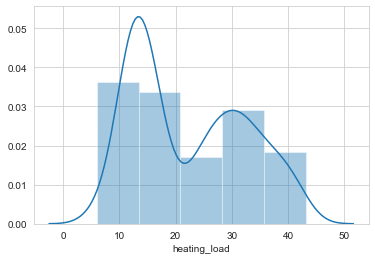

In [121]:
sns.distplot(db['heating_load'], bins=5)

# In boxplot, we do not have outlier

<AxesSubplot:xlabel='relative_compactness', ylabel='heating_load'>

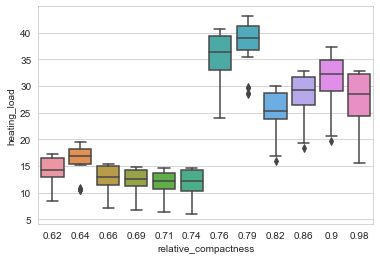

In [129]:
sns.boxplot(x='relative_compactness',y='heating_load',data=db )

<AxesSubplot:xlabel='relative_compactness', ylabel='cooling_load'>

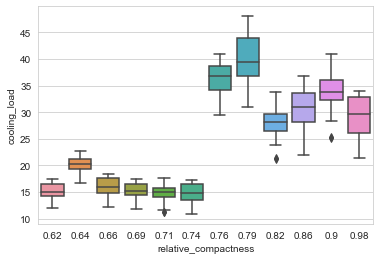

In [130]:
sns.boxplot(x='relative_compactness',y='cooling_load',data=db )

<AxesSubplot:xlabel='surface_area', ylabel='heating_load'>

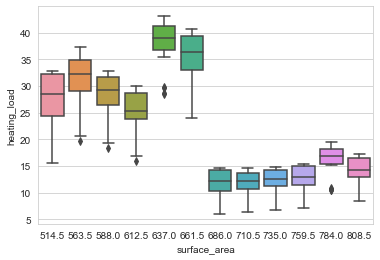

In [131]:
sns.boxplot(x='surface_area',y='heating_load',data=db )

<AxesSubplot:xlabel='relative_compactness', ylabel='cooling_load'>

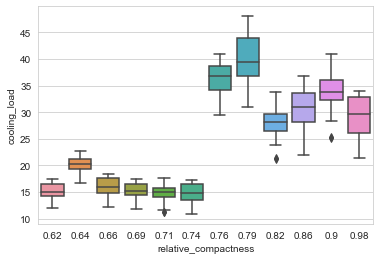

In [132]:
sns.boxplot(x='relative_compactness',y='cooling_load',data=db )

<AxesSubplot:xlabel='orientation', ylabel='heating_load'>

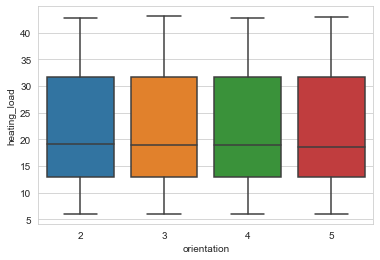

In [133]:
sns.boxplot(x='orientation',y='heating_load',data=db )

<AxesSubplot:xlabel='relative_compactness', ylabel='cooling_load'>

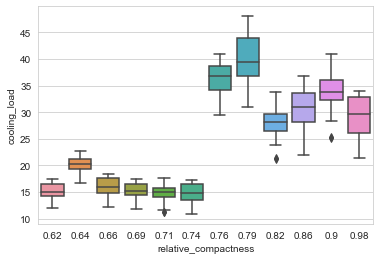

In [134]:
sns.boxplot(x='relative_compactness',y='cooling_load',data=db )

<AxesSubplot:xlabel='wall_area', ylabel='heating_load'>

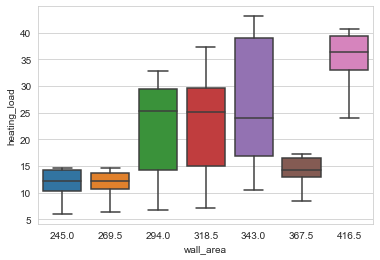

In [135]:
sns.boxplot(x='wall_area',y='heating_load',data=db )

<AxesSubplot:xlabel='wall_area', ylabel='cooling_load'>

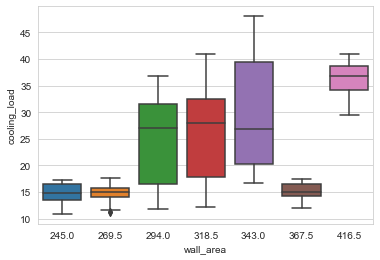

In [137]:
sns.boxplot(x='wall_area',y='cooling_load',data=db )